In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import json
import os

DIR_NAME = './flow_routes_repetition_degree/'
BAR_WIDTH = 0.2

C:\Users\homet\workspace\pycharm_workspace\tsn_routing_scheduling\envs\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


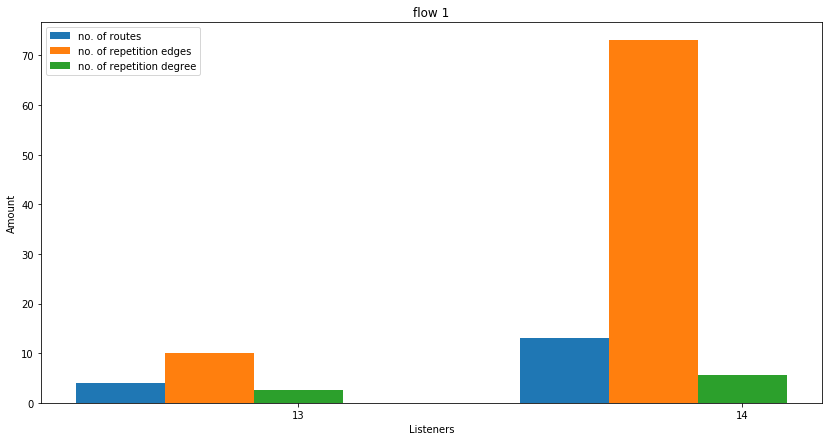

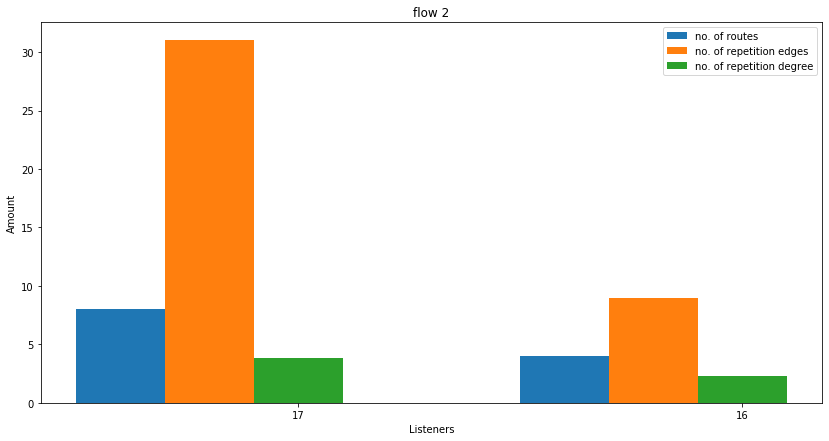

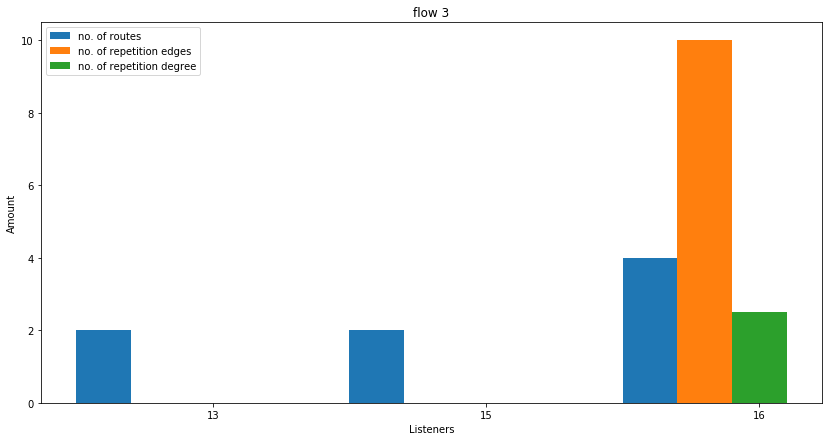

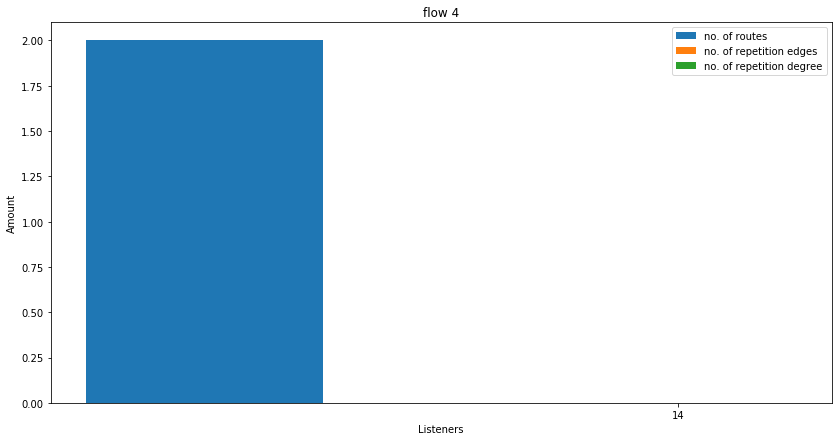

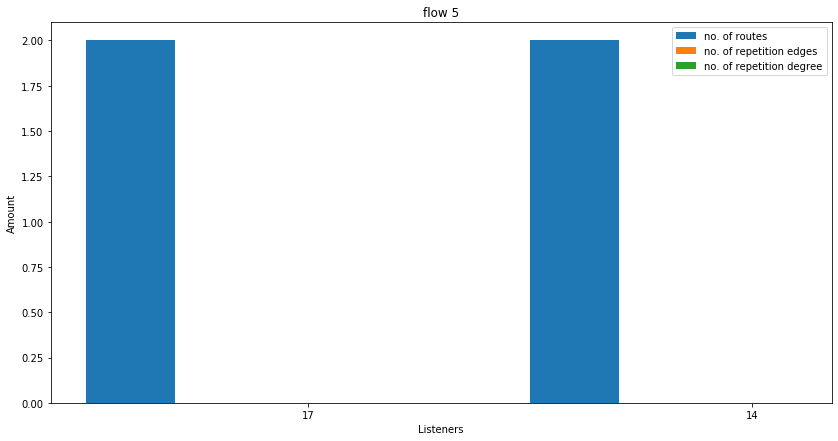

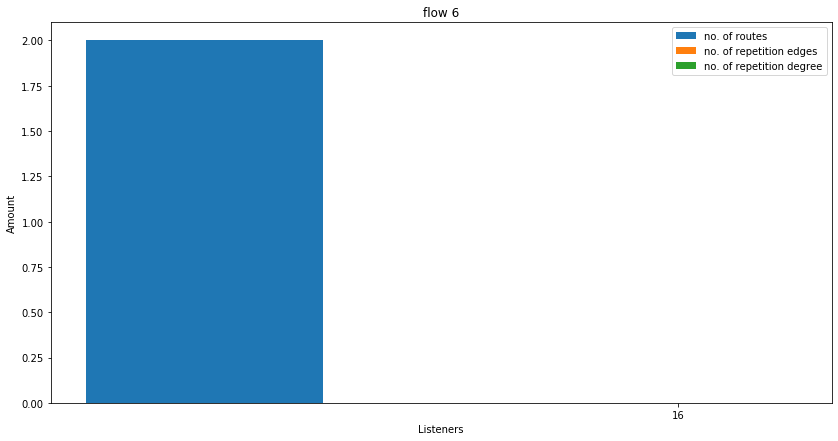

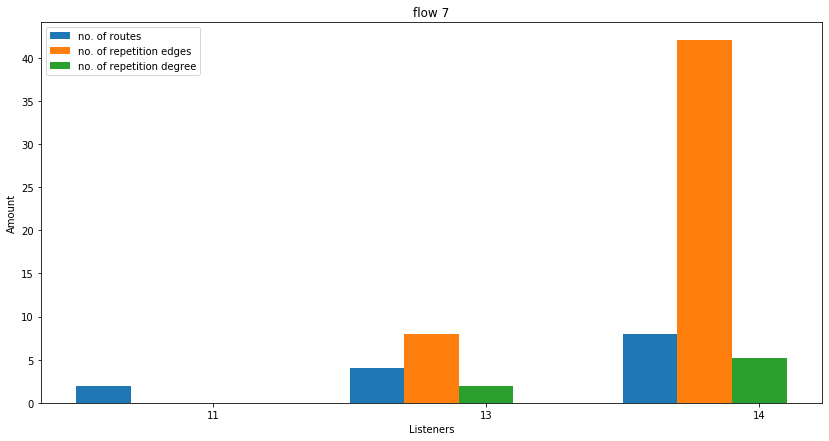

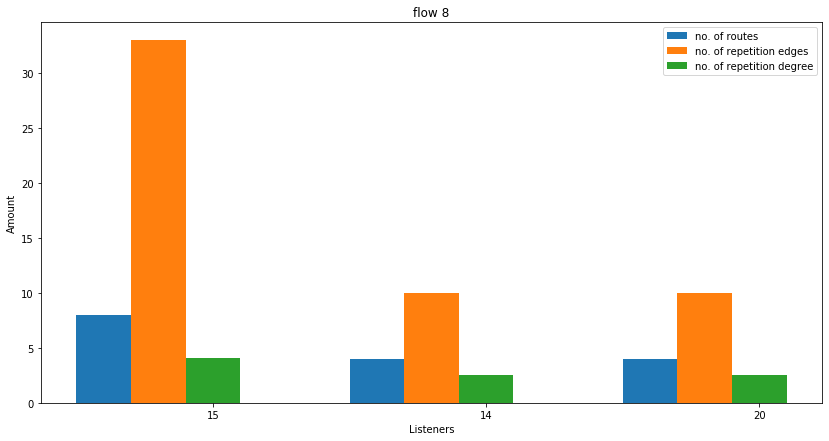

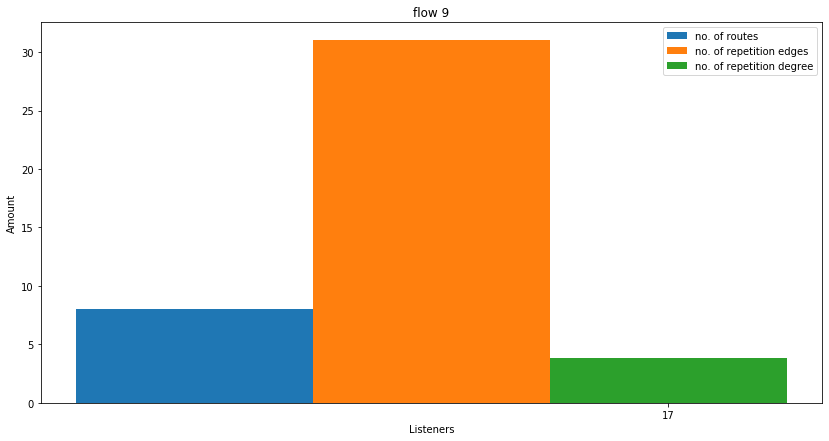

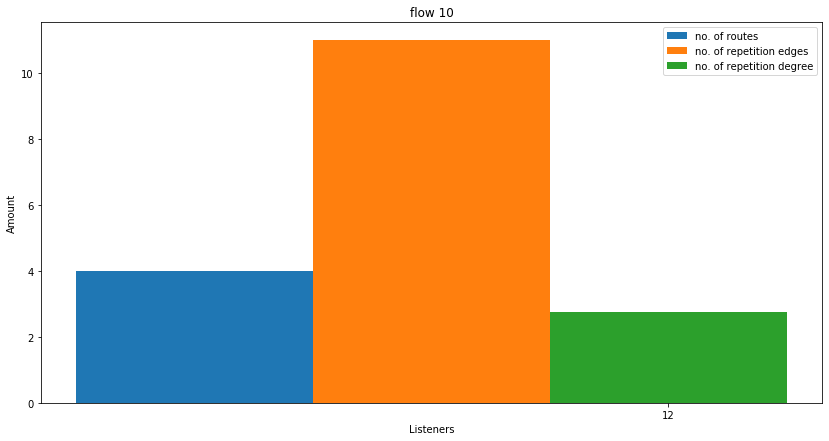

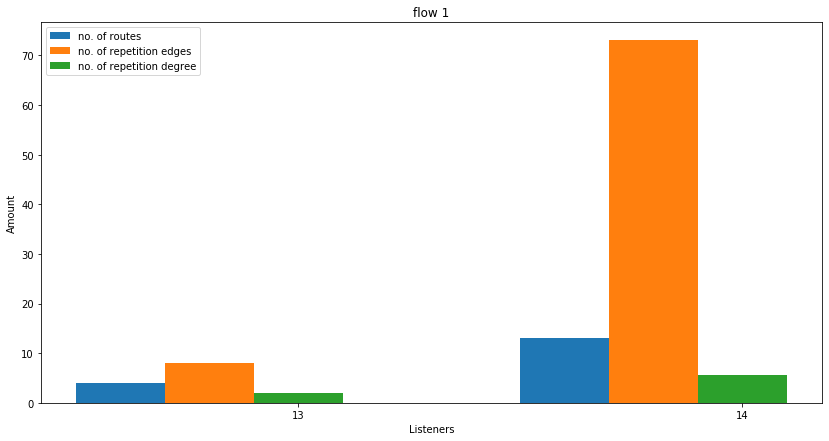

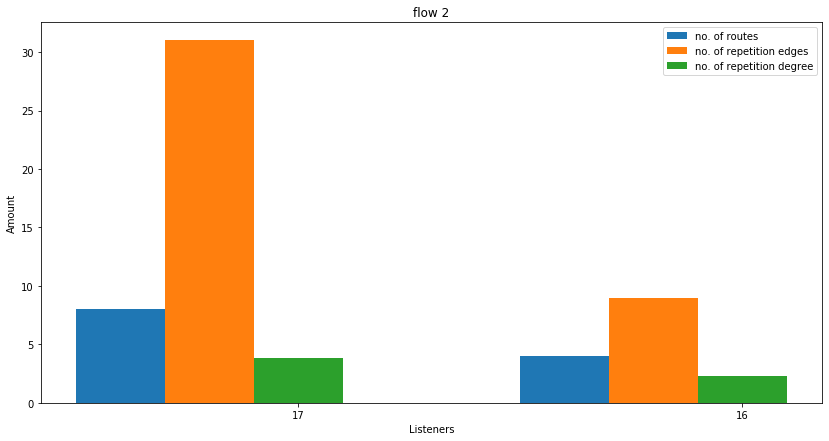

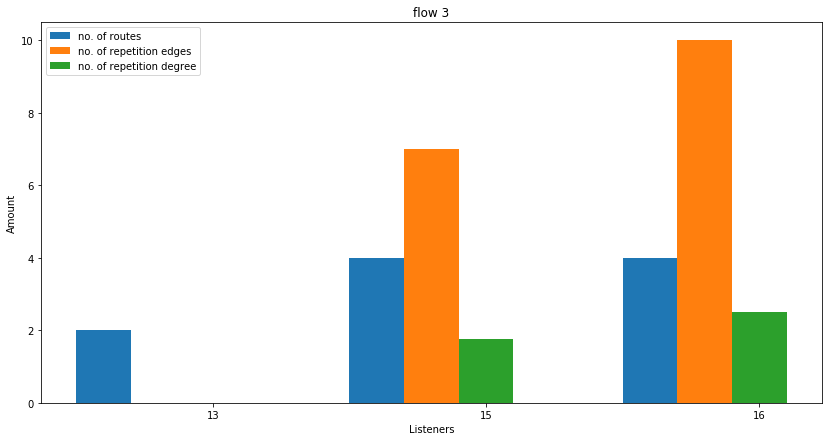

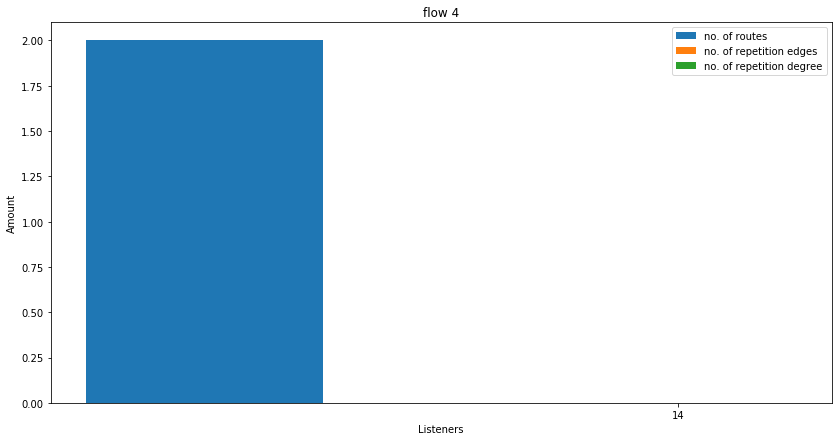

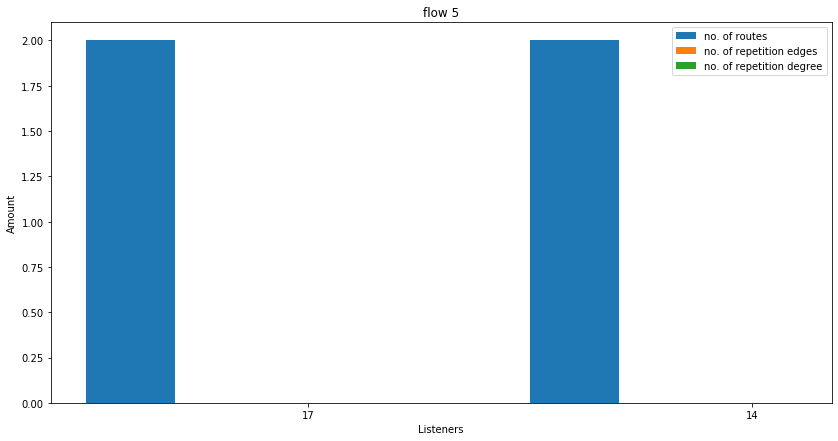

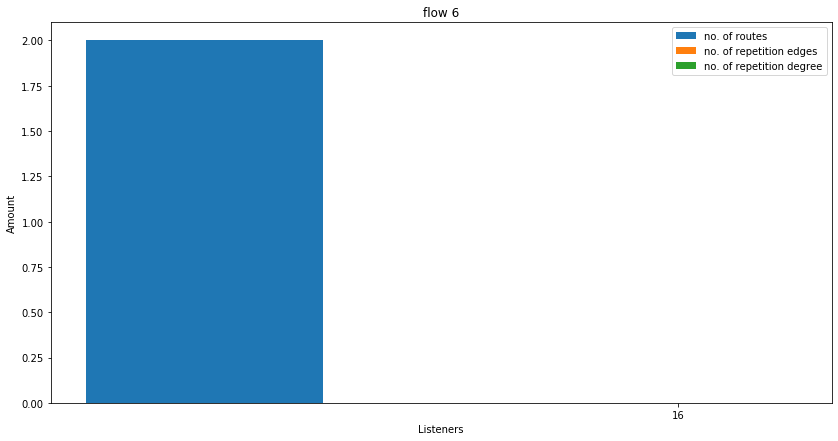

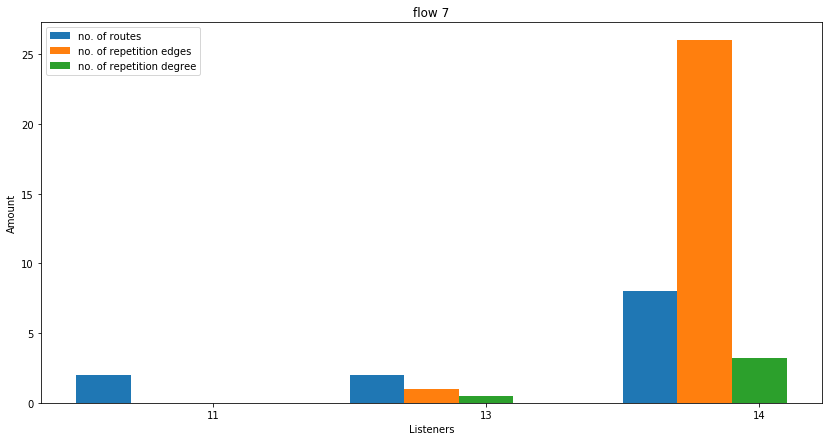

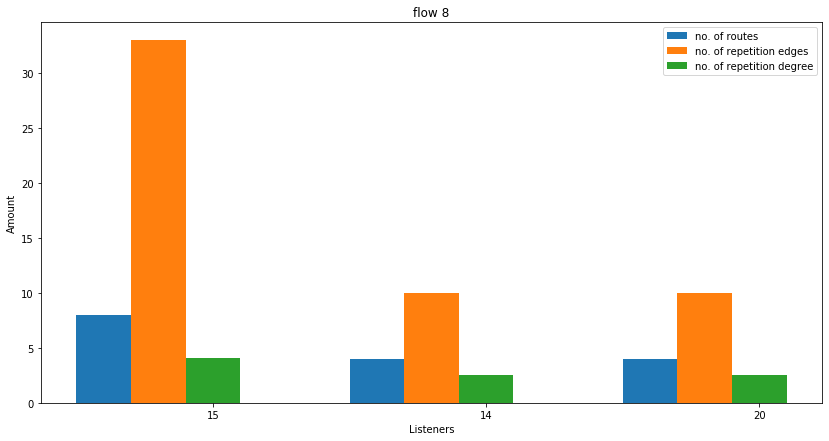

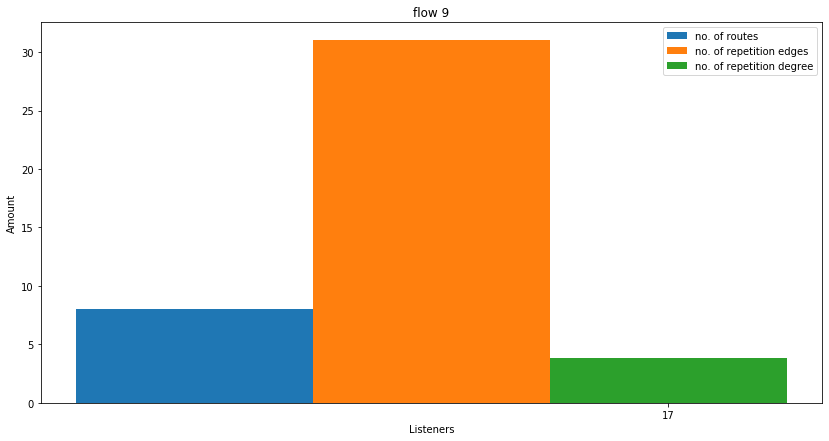

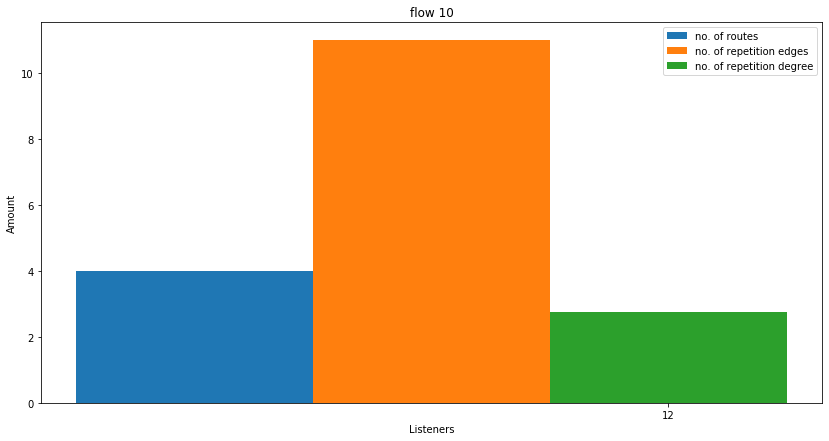

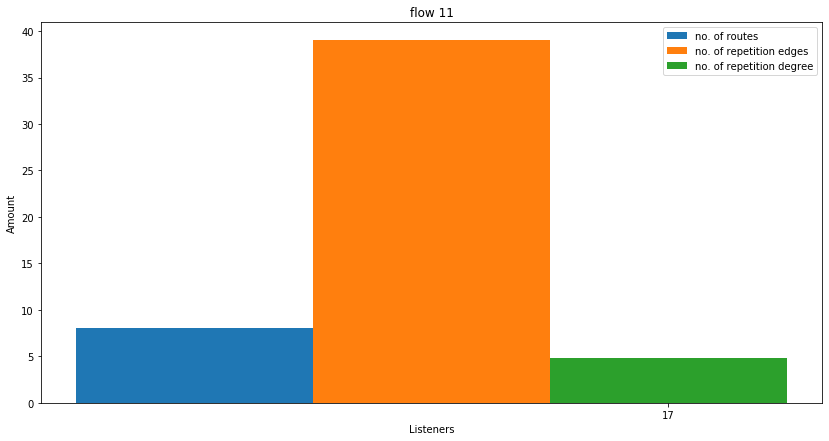

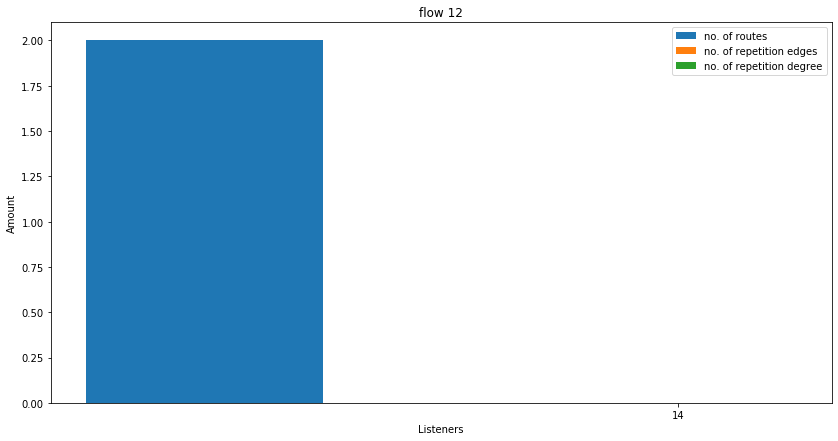

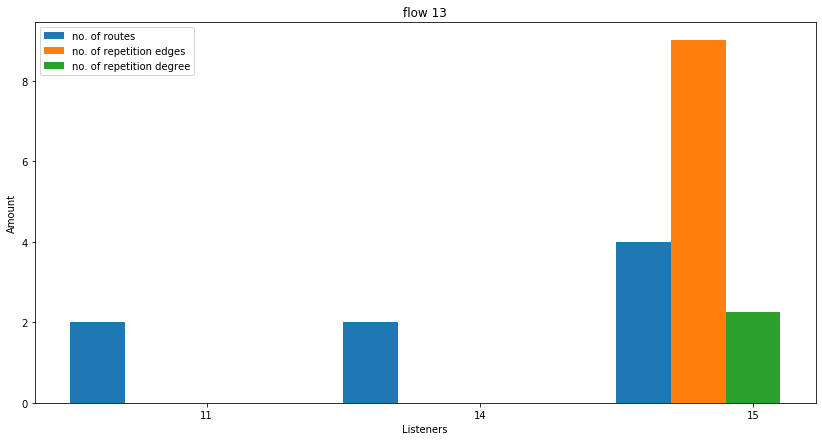

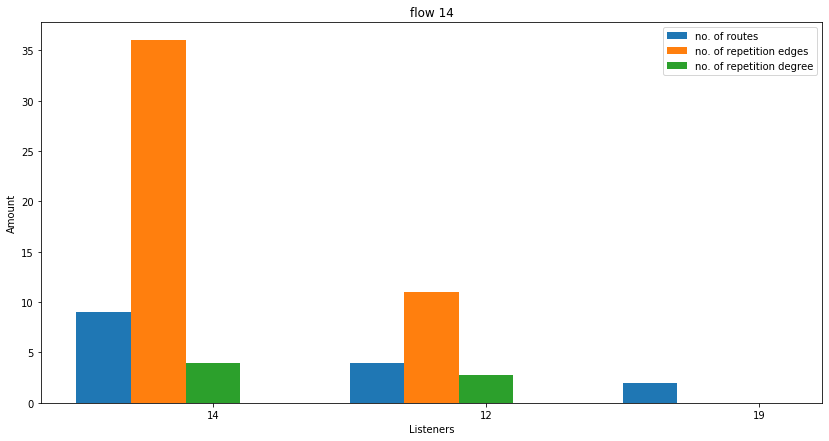

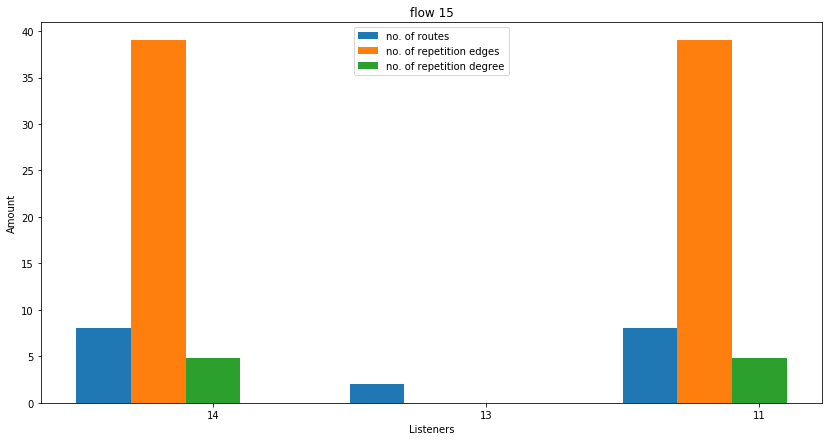

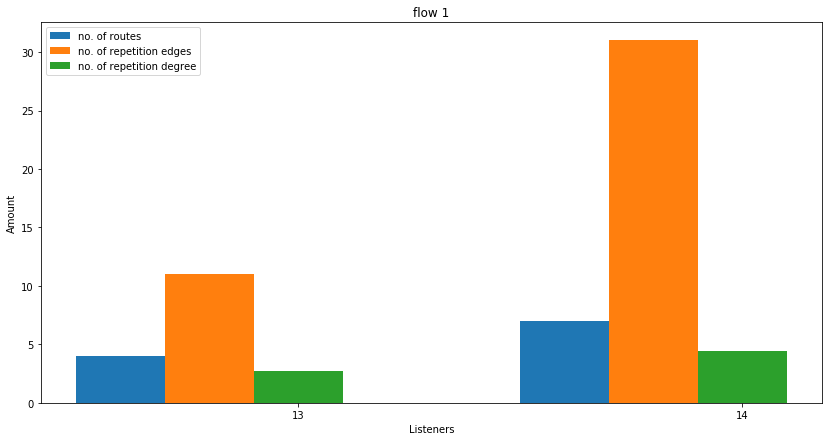

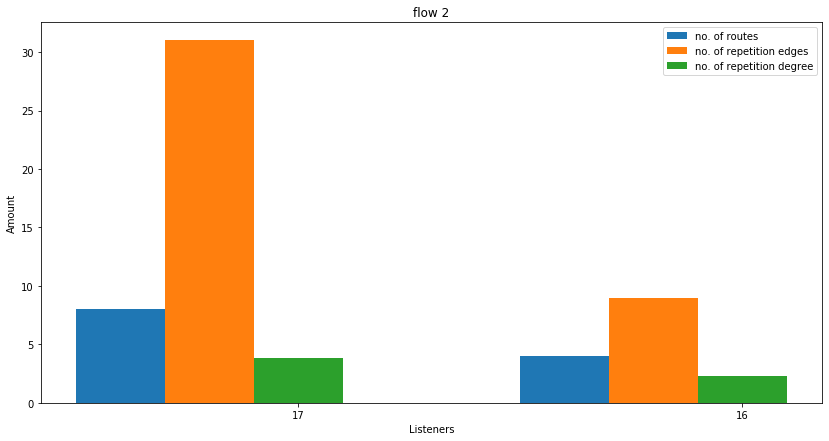

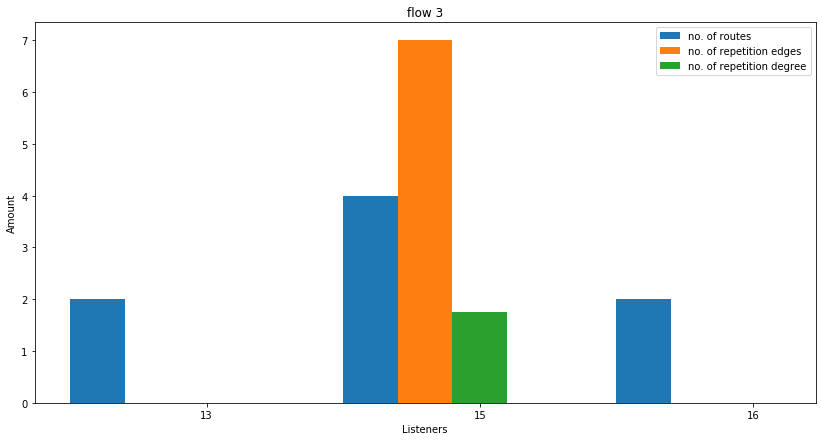

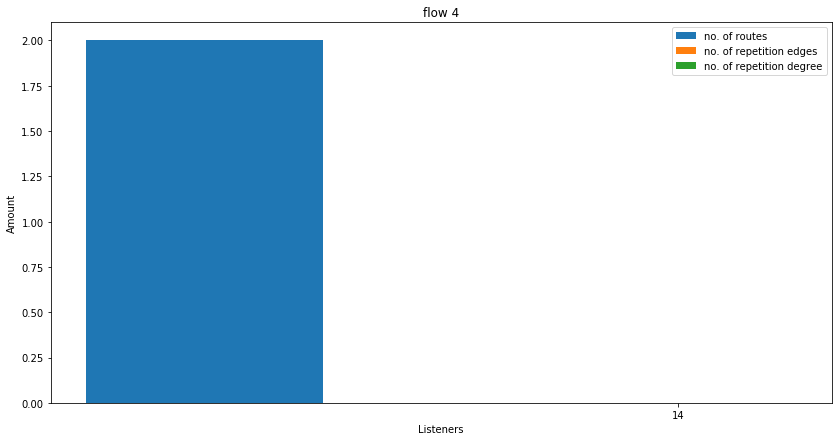

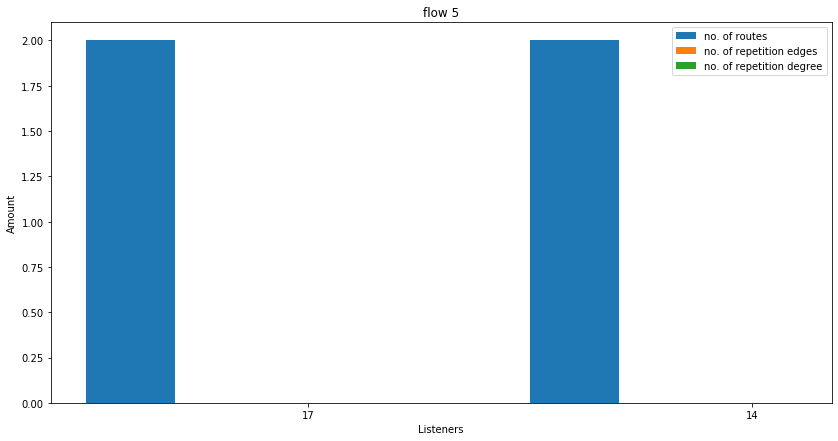

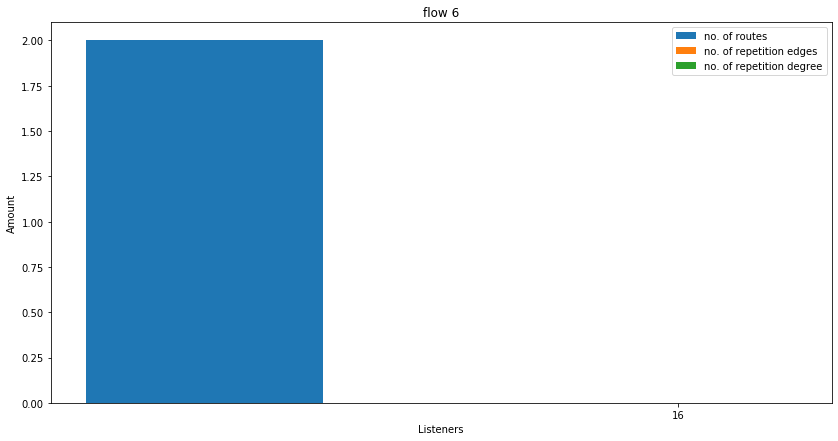

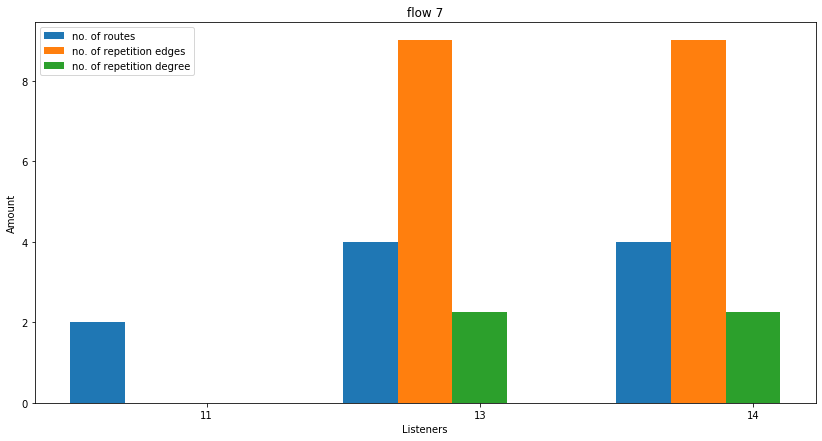

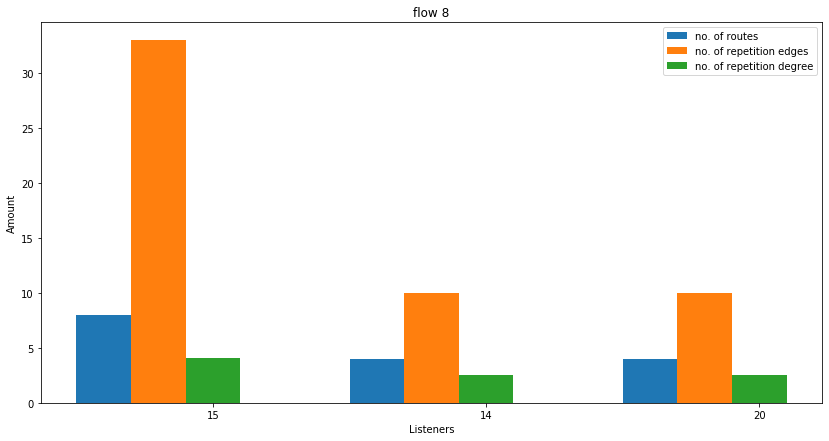

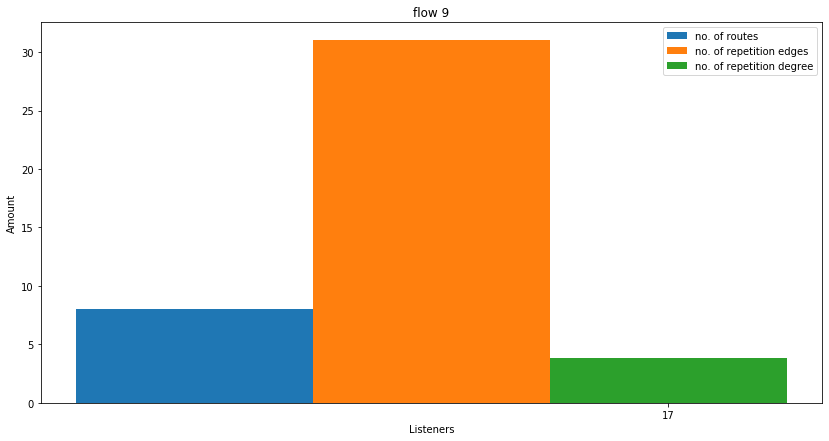

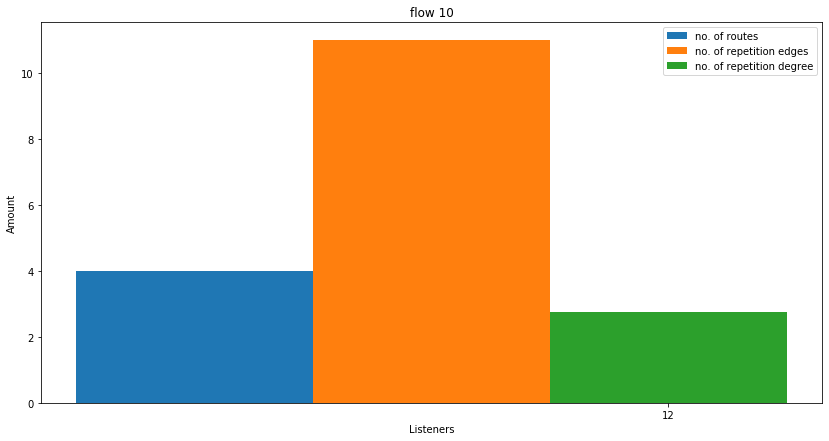

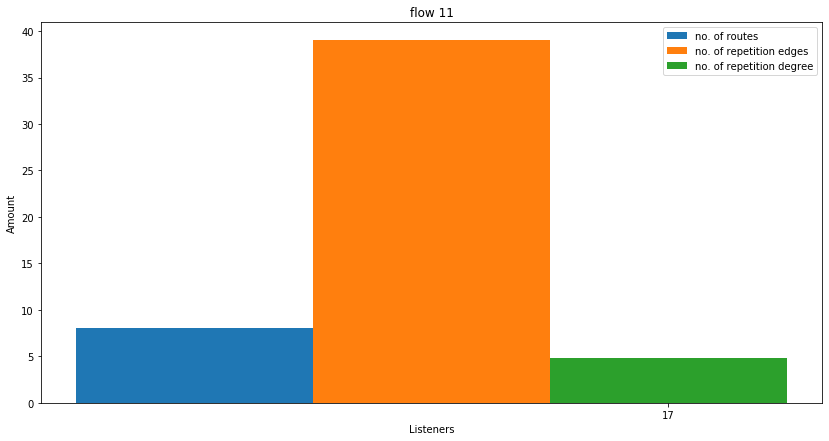

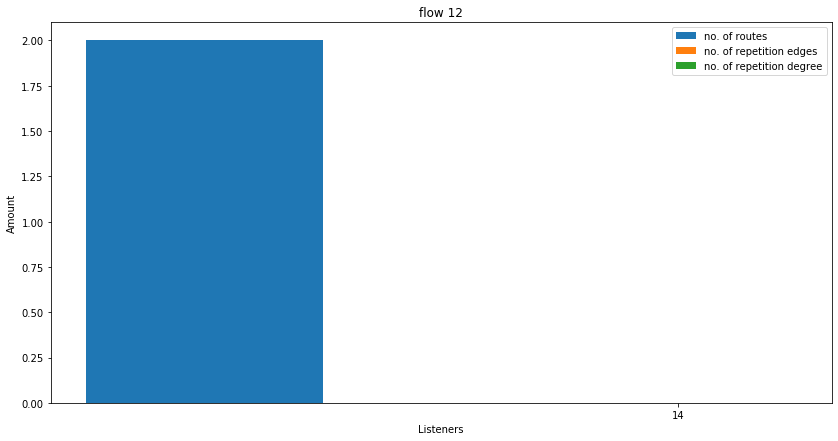

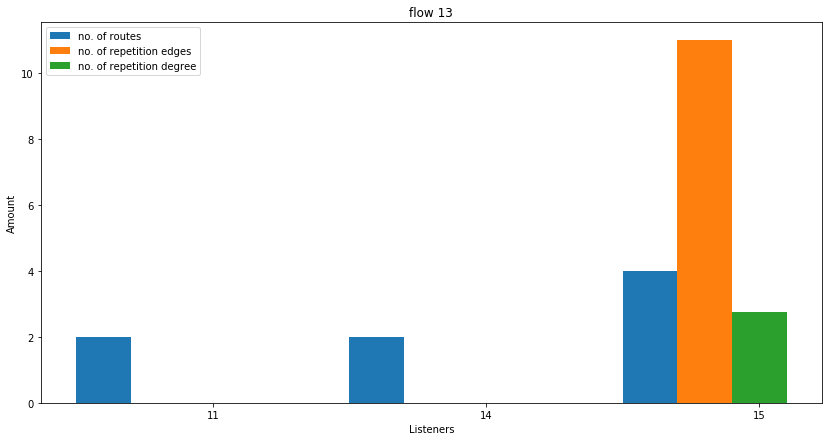

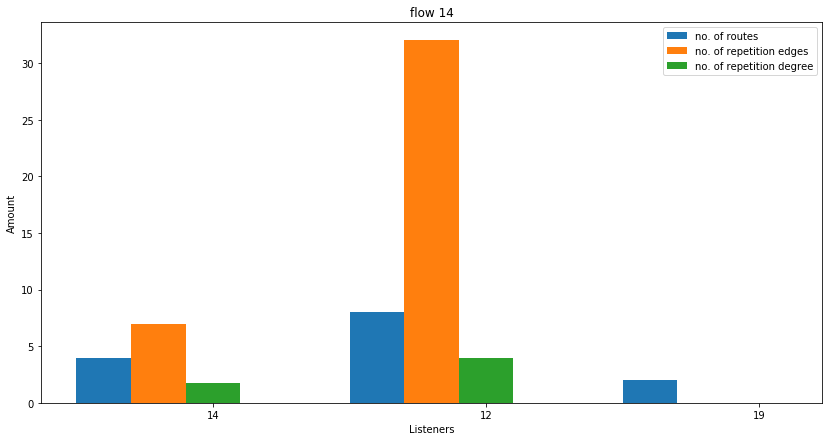

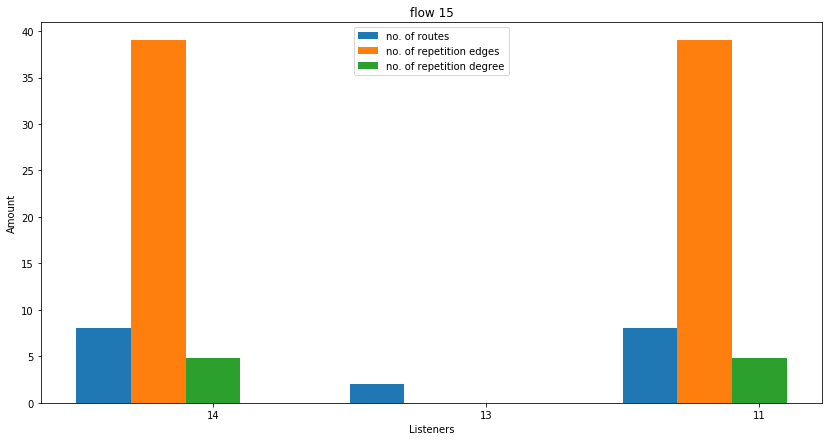

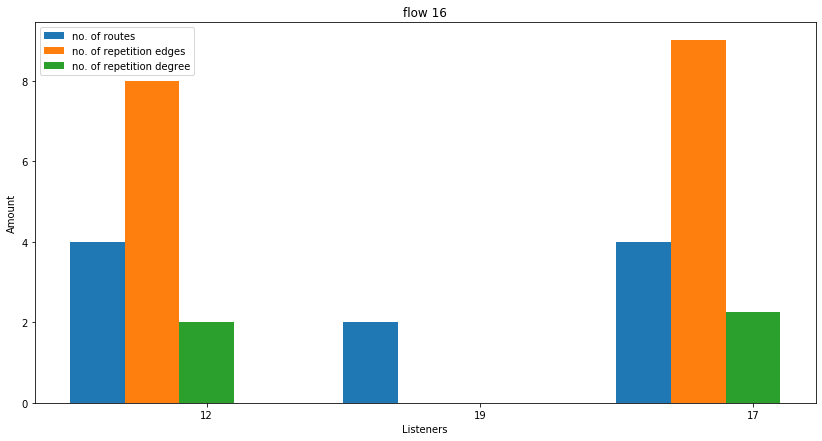

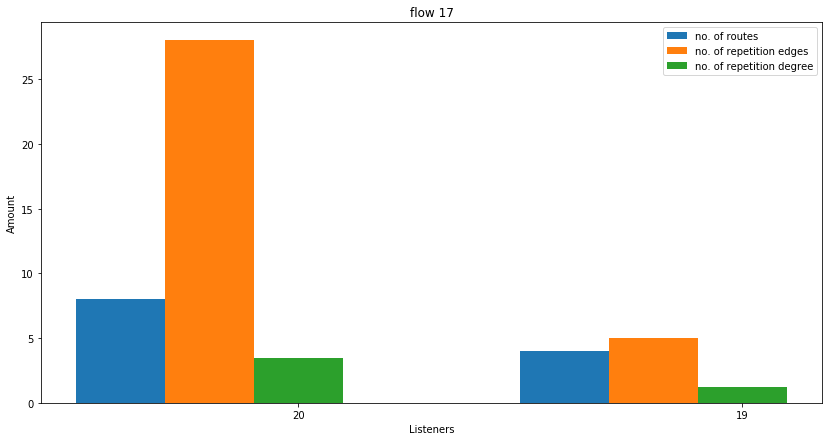

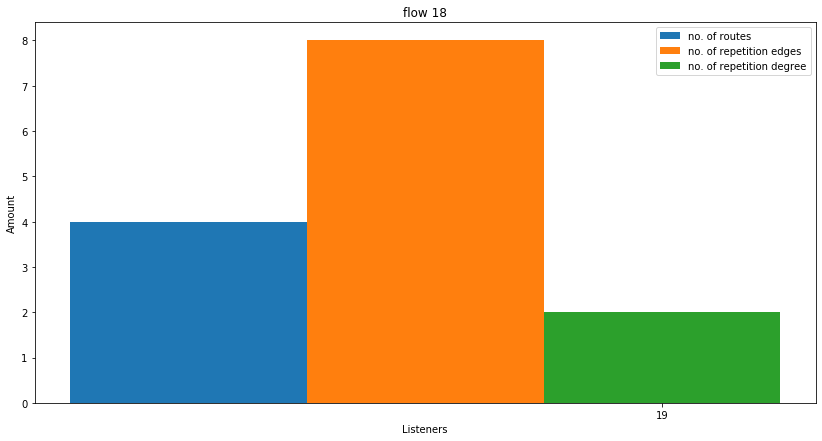

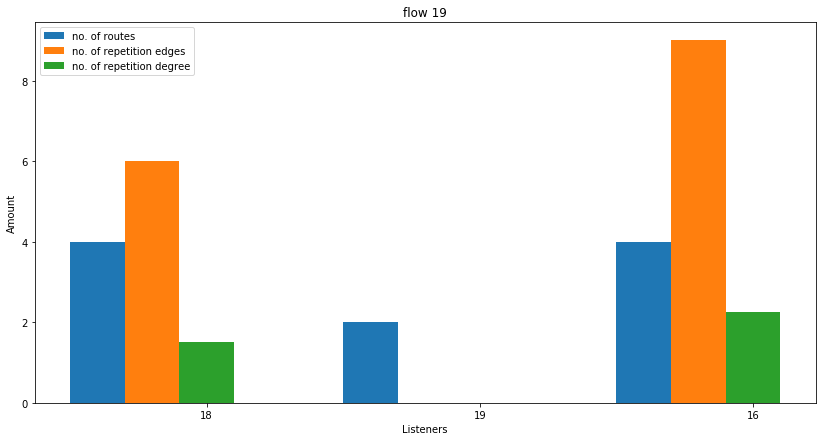

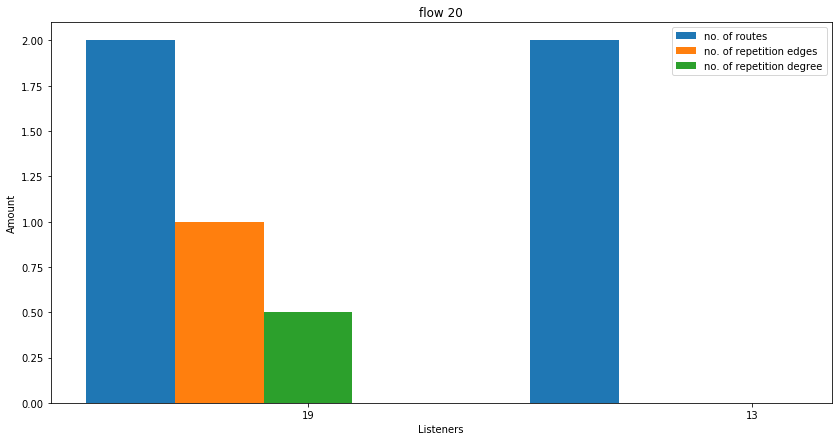

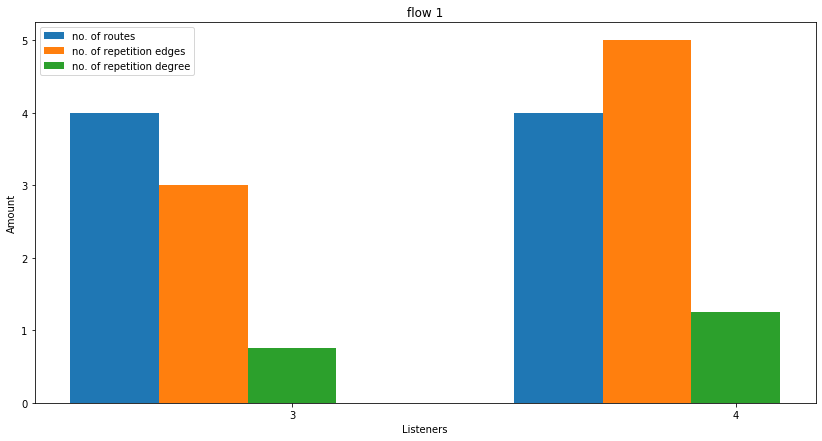

In [10]:
def v_repetition_degree_per_talker_listener_pair(filename):
    with open(filename, 'r') as file:
        res = json.load(file)
        for (flow_id, pairs) in res.items():
            fig, ax = plt.subplots(figsize=(14,7))
            dest_id_list = []
            no_of_routes_list = []
            no_of_repetition_edges_list = []
            no_of_repetition_degree_list = []
            for pair in pairs:
                dest_id_list.append(pair[1])
                no_of_routes_list.append(pair[2])
                no_of_repetition_edges_list.append(pair[3])
                no_of_repetition_degree_list.append(pair[4])
            labels = ['{}'.format(dest_id) for dest_id in dest_id_list]
            ax.bar(np.arange(len(dest_id_list))+BAR_WIDTH*0, no_of_routes_list, width=BAR_WIDTH, tick_label=labels, label='no. of routes')
            ax.bar(np.arange(len(dest_id_list))+BAR_WIDTH*1, no_of_repetition_edges_list, width=BAR_WIDTH, tick_label=labels, label='no. of repetition edges')
            ax.bar(np.arange(len(dest_id_list))+BAR_WIDTH*2, no_of_repetition_degree_list, width=BAR_WIDTH, tick_label=labels, label='no. of repetition degree')
            ax.legend()
            ax.set_title('flow {}'.format(flow_id))
            ax.set_xlabel('Listeners')
            ax.set_ylabel('Amount')


filenames = os.listdir(DIR_NAME)
for filename in filenames:
    if os.path.splitext(filename)[1] == '.json':
        v_repetition_degree_per_talker_listener_pair(os.path.join(DIR_NAME, filename))

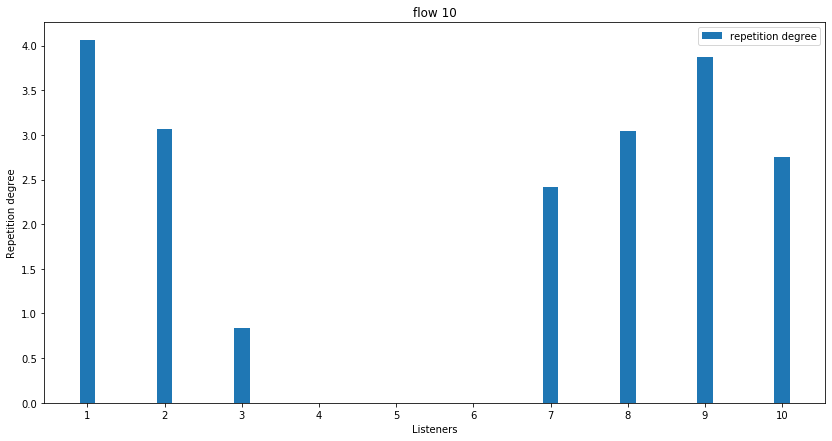

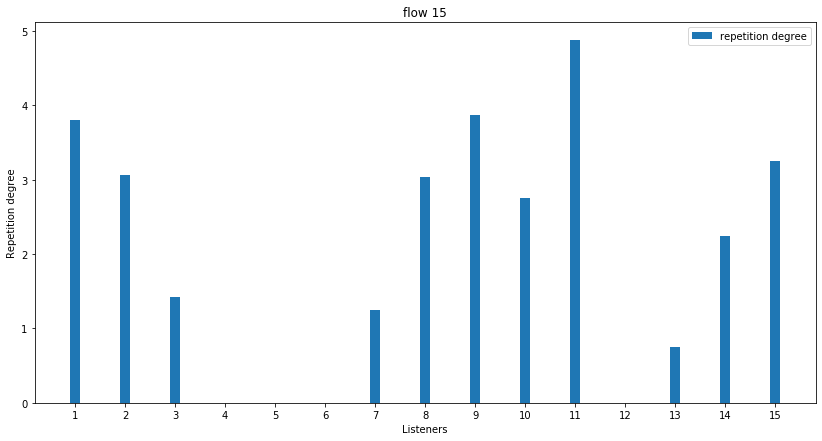

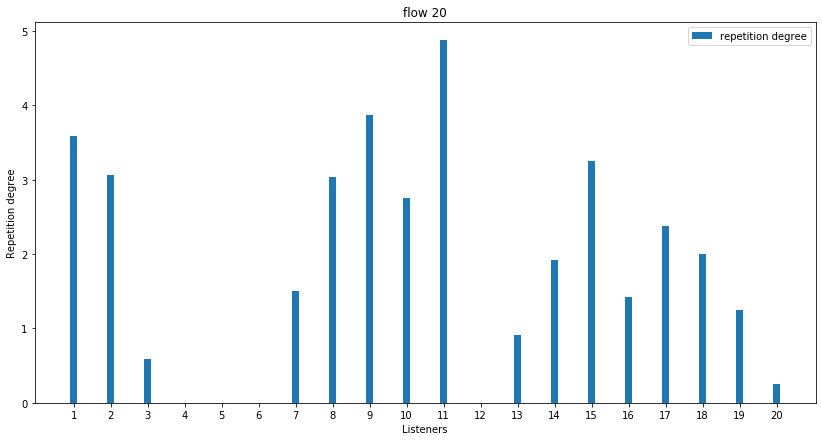

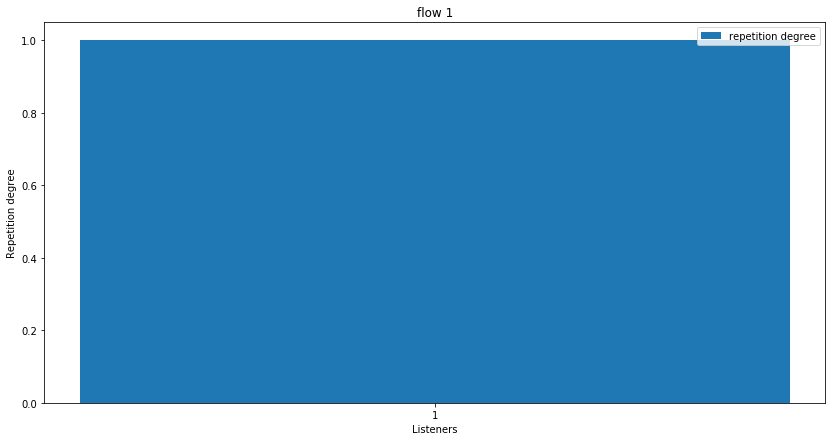

In [12]:
def v_repetition_degree_per_flow(filename):
    with open(filename, 'r') as file:
        res = json.load(file)
        fig, ax = plt.subplots(figsize=(14,7))
        repetition_degree_per_flow_list = []
        for (flow_id, pairs) in res.items():
            dest_id_list = []
            no_of_repetition_edges_list = []
            for pair in pairs:
                dest_id_list.append(pair[1])
                no_of_repetition_edges_list.append(pair[4])  # no_of_repetition_edges / no_of_e2e_routes
            no_of_dest = len(dest_id_list)
            repetition_degree_per_flow = np.sum(no_of_repetition_edges_list) / no_of_dest
            repetition_degree_per_flow_list.append(repetition_degree_per_flow)
        labels = ['{}'.format(flow_id) for flow_id in res.keys()]
        ax.bar(np.arange(len(res)), repetition_degree_per_flow_list, width=BAR_WIDTH, tick_label=labels, label='repetition degree')
        ax.legend()
        ax.set_title('flow {}'.format(flow_id))
        ax.set_xlabel('Listeners')
        ax.set_ylabel('Repetition degree')


filenames = os.listdir(DIR_NAME)
for filename in filenames:
    if os.path.splitext(filename)[1] == '.json':
        v_repetition_degree_per_flow(os.path.join(DIR_NAME, filename))
        